# ALGORITMO DE IA-2: KNN

ENUNCIADO:  
O KNN é um poderoso método de classificação e predição de dados, sendo muito popular e de fácil implementação. Este algoitmo compara os novos elementos com os dados fornecidos na base de treino, que estão salvos na memória. O objetivo de KNN é categorizar esses dados baseado na sua proximidade e similaridade com os dados de treino.  
O fator K define quantos elementos próximos o algoritmo deve analisar, definindo seu valor baseado em qual categoria apresenta maior quantidade entre os K pontos mais próximos.  
Seu objetivo será utilizar os datasets fornecidos para criar um modelo de classificação, utilizando o algoritmo de KNN. Para sua implementação, é requisitado que seja utilizado algum algoritmo de KNN, além de validação cruzada. 


## CASO 01: DATASET IRIS 

1) Importar livrarías

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.datasets import load_iris

2) Importar e formatar o dataset

In [3]:
#importar dataset
data = load_iris()

#gerar dataframe único que contenha a matriz de caraterísticas e saídas
dataset = pd.concat([pd.DataFrame(data['data']), pd.DataFrame(data['target'])], axis = 1)

#agregar os metadados no dataframe
dataset.columns = np.concatenate((data['feature_names'], ['CLASS']))
print('População do dataset: ', len(dataset))
dataset.head(20)

População do dataset:  150


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),CLASS
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


3) Definir variáveis independente e dependente:
- Variáveis independentes: sepal_length, ..., petal_width
- Variável dependente: CLASS

In [4]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

4) ANÁLISE EXPLORATÓRIO:  
Analizar o comportamento/distribuição dos dados no espaço

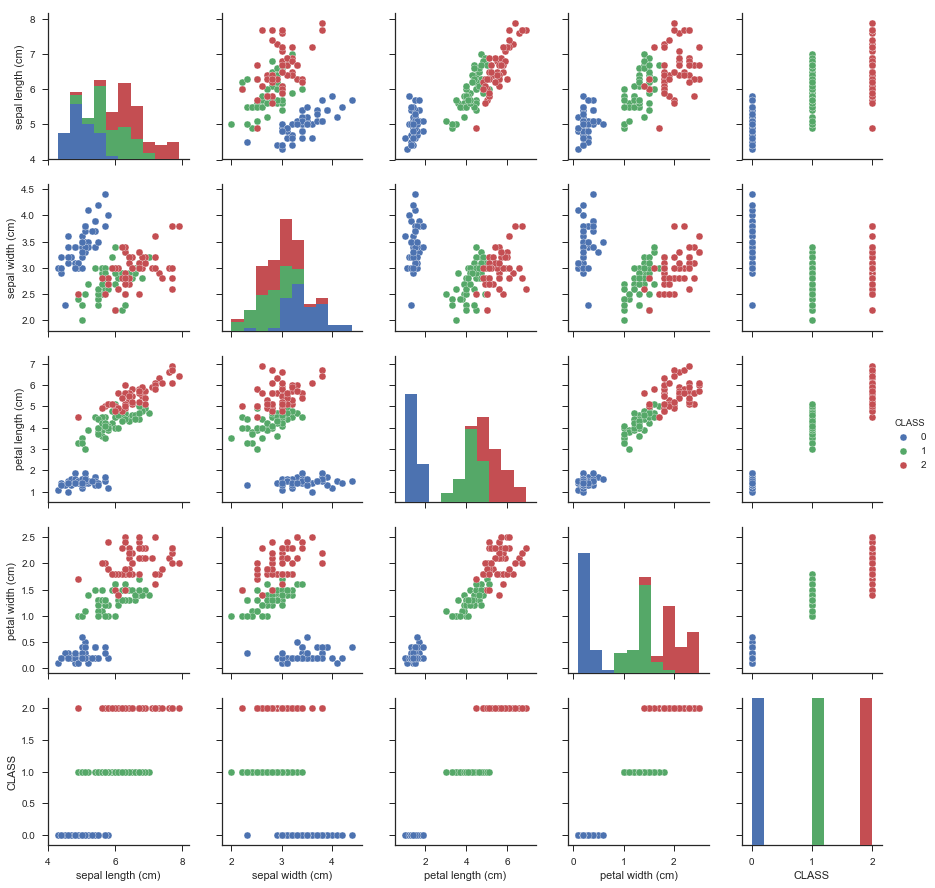

In [16]:
#Diagrama de dispersão
sbn.pairplot(dataset, hue = 'CLASS', size = 2.5)

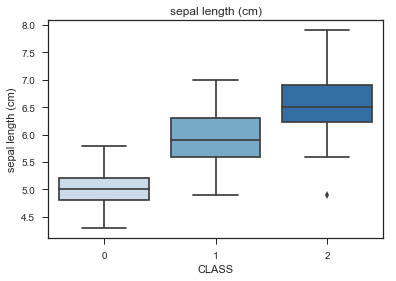

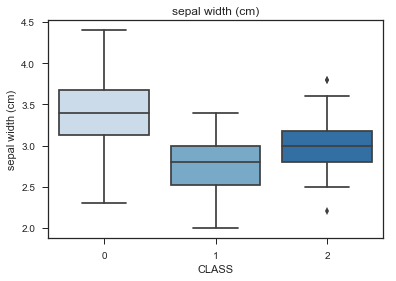

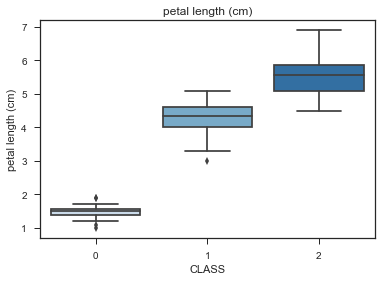

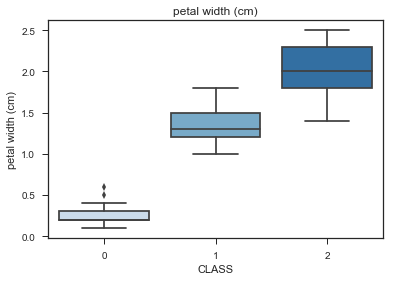

In [33]:
#função para criar gráfico de caixa múltiplo
def box_plot_iris(dataset):
    for i in range(len(dataset.columns)-1):
        ax1 = sbn.boxplot(x = dataset[dataset.columns[-1]], y = dataset[dataset.columns[i]], palette = 'Blues').set_title(dataset.columns[i])
        plt.show(ax1)

#plotar gráfico de caixa        
box_plot_iris(dataset)

5) FASE DE PREPROCESSAMENTO


In [43]:
#sampling: dividir o dataset em conjunto de treinamento/teste
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

#verificando a divisão do dataset
print('#Amostras conj. treinamento: ', len(x_train))
print('#Amostras conj. teste: ', len(x_test))

#Amostras conj. treinamento:  105
#Amostras conj. teste:  45


In [44]:
#standarização: x_std = (x- ux)/sigma(x)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

6) FASE DE APRENDIZADO

Adota-se como estratégia: 
- Dividir o conjunto de treinamento usando HoldOut, definindo um conjunto de treinamento e de teste. 
- O conjunto de treinamento preliminar será usado para o processo de hyperparameter tuning, sendo assim dividido em um conjunto de treinamento e de validação (aqui usa-se 10-fold cross-validation) que farão o treinamento até achar os parâmetros que gerem o melhor modelo possível.  
- Escolhido o melhor conjunto de parâmetros, cria-se uma função de ajuste. O modelo resultante faz a predição de resultados e é usado para verificar a performance (acurácia) nos conjuntos de treino e de teste.

<img src = 'img/strategy.png'>

In [46]:
#importar livrarias
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

#construção de pipeline para o treinamento
knn = KNeighborsClassifier()

In [55]:
#definição de conjunto de parâmetros alternativos
import time

params = {
    'n_neighbors': np.arange(2, 11), 
    'leaf_size': np.arange(1, 6), 
    'weights': ['uniform', 'distance'], 
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

#treinamento usando GridSearch Cross-validation [10 folds]
start_time = time.clock()
grid = GridSearchCV(knn, param_grid = params, cv = 10)
grid.fit(x_train, y_train)
tempo = time.clock() - start_time

#hyperparameter tuning: melhores parametros
print('Tempo de treinamento: ', tempo, ' seg')
print('Parâmetros ótimos: ', grid.best_params_)

Tempo de treinamento:  12.52376456098932  seg
Parâmetros ótimos:  {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 5, 'weights': 'uniform'}


7) FASE DE AVALIAÇÃO

In [72]:
#lista de acurácias
print('Acurácia: ', grid.grid_scores_)

Acurácia:  [mean: 0.94286, std: 0.05904, params: {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 2, 'weights': 'uniform'}, mean: 0.93333, std: 0.06266, params: {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 2, 'weights': 'distance'}, mean: 0.92381, std: 0.09422, params: {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 3, 'weights': 'uniform'}, mean: 0.93333, std: 0.07268, params: {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 3, 'weights': 'distance'}, mean: 0.94286, std: 0.07330, params: {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 4, 'weights': 'uniform'}, mean: 0.94286, std: 0.06493, params: {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 4, 'weights': 'distance'}, mean: 0.96190, std: 0.05698, params: {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 5, 'weights': 'uniform'}, mean: 0.96190, std: 0.05698, params: {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 5, 'weights': 'distance'}, mean: 0.96190, std: 0.05698, params: {'algorithm': 'auto

C:\Users\Dr. Notebook\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [76]:
#obter o melhor estimador
classifier = grid.best_estimator_
classifier.fit(x_train, y_train)

#predição de valores
y_pred = classifier.predict(x_test)

#função para mostrar resultados: y_test Vs. y_pred
def print_predictions(y_true, y_pred):
    print('\t y_true \t y_pred')
    for i in range(len(y_true)):
        if(y_true[i] != y_pred[i]):
            print('\t', round(y_true[i], 4), '\t \t', round(y_pred[i], 4), '\t ***')
        else:
            print('\t', round(y_true[i], 4), '\t \t', round(y_pred[i], 4))
        
#mostrar resultados
print_predictions(y_test, y_pred)

	 y_true 	 y_pred
	 2 	 	 2
	 1 	 	 1
	 0 	 	 0
	 2 	 	 2
	 0 	 	 0
	 2 	 	 2
	 0 	 	 0
	 1 	 	 1
	 1 	 	 1
	 1 	 	 1
	 2 	 	 2
	 1 	 	 1
	 1 	 	 1
	 1 	 	 1
	 1 	 	 1
	 0 	 	 0
	 1 	 	 1
	 1 	 	 1
	 0 	 	 0
	 0 	 	 0
	 2 	 	 2
	 1 	 	 1
	 0 	 	 0
	 0 	 	 0
	 2 	 	 2
	 0 	 	 0
	 0 	 	 0
	 1 	 	 1
	 1 	 	 1
	 0 	 	 0
	 2 	 	 2
	 1 	 	 1
	 0 	 	 0
	 2 	 	 2
	 2 	 	 2
	 1 	 	 1
	 0 	 	 0
	 1 	 	 2 	 ***
	 1 	 	 1
	 1 	 	 1
	 2 	 	 2
	 0 	 	 0
	 2 	 	 2
	 0 	 	 0
	 0 	 	 0


In [77]:
#calcular a acurácia do melhor estimador no conjunto de treinamento
print('Acurácia no conjunto de treinamento: ', 100 * round(grid.best_score_, 4), '%')

#calcular a acurácia do melhor estimador no conjunto de teste
print('Acurácia no conjunto de teste: ', 100 * round(classifier.score(x_test, y_test), 4), '%')

Acurácia no conjunto de treinamento:  96.19 %
Acurácia no conjunto de teste:  97.78 %


8) CONCLUSÕES  
- O melhor modelo obtido possui os seguintes hiperparâmetros: 
{'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 5, 'weights': 'uniform'}
- A Acurácia no conjunto de treinamento é de 96.19%
- A Acurácia no conjunto de teste é de 97.78%
- Os resultados de acurácia deixam evidente um bom grau de generalização do modelo sob os dados treinados e sobre dados nunca vistos.